#Lab 1. An Introduction to Pandas and Python

In [1]:
import ssl
from functools import wraps
def sslwrap(func):
    @wraps(func)
    def bar(*args, **kw):
        kw['ssl_version'] = ssl.PROTOCOL_TLSv1
        return func(*args, **kw)
    return bar

ssl.wrap_socket = sslwrap(ssl.wrap_socket)

In [2]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline 
#this line above prepares IPython notebook for working with matplotlib

# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import urllib2
import math
import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

#reload (sys)
#sys.setdefaultencoding('utf8')

import requests
r = requests.get('https://www.cehq.gouv.qc.ca/depot/historique_donnees/fichier/021407_Q.txt')
r

In [3]:
url = 'https://www.cehq.gouv.qc.ca/depot/historique_donnees/fichier/021407_Q.txt'

site = urllib2.urlopen(url)

URLError: <urlopen error EOF occurred in violation of protocol (_ssl.c:590)>

In [3]:
#from IPython.display import display

# À tester

In [5]:
#df=pd.read_table("eaux_volees.txt", skiprows=20, sep=r"\s+",
               #names=['station', 'date', 'debit', 'remarque'], engine='python', skip_blank_lines=True)
#df=pd.read_table("eaux_volees.txt", skiprows=20, index_col=1,
#               names=['station', 'date', 'debit', 'remarque'], skip_blank_lines=True,
# skipinitialspace=False, delim_whitespace=True)

df=pd.read_csv('tonnerre.txt', skiprows=20, sep=r"\s+",
               names=['station', 'date', 'debit', 'remarque'], engine='python', index_col=1)

#df=pd.read_csv("sainte_anne.txt", skiprows=20, sep=r"\s+",
 #              names=['station', 'date', 'debit', 'remarque'], engine='python', index_col=1)
#df_sliced=df[50:100]
#df_sliced.head(50)

- Le fichier entrant doit être un tab separated value (tab).

In [6]:
#df['mon']=df.index.month
type(df.index)

pandas.core.index.Index

In [7]:
#df['date']=df.date.astype(str)

In [8]:
#df['date']=pd.to_datetime(df['date'], format='%Y/%m/%d')
df.index=pd.to_datetime(df.index)

In [9]:
df.dtypes

station       int64
debit       float64
remarque     object
dtype: object

The shape of the object is:

In [10]:
df.describe()

,station,debit
count,3368,3149.000000
mean,73303,17.521458
std,0,21.655752
min,73303,0.988000
25%,73303,3.080000
50%,73303,8.850000
75%,73303,22.100000
max,73303,160.000000


In [11]:
#df=df.dropna()
#df=df[~df.isnull()]
#f_sliced=df[50:100]
#df_sliced.head(50)

17.5214579232 17.5214579232 8.85


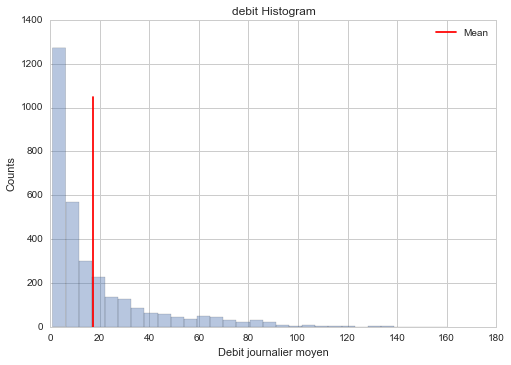

In [12]:
sns.set_context("notebook")
meanrat=df.debit.mean()
#you can get means and medians in different ways
print meanrat, np.mean(df.debit), df.debit.median()
with sns.axes_style("whitegrid"):
    df.debit.hist(bins=30, alpha=0.4);
    plt.axvline(meanrat, 0, 0.75, color='r', label='Mean')
    plt.xlabel("Debit journalier moyen")
    plt.ylabel("Counts")
    plt.title("debit Histogram")
    plt.legend()
    #sns.despine()

Il est intéressant de remarquer que les calculs se font uniquement sur les valeurs Integer automatiquement sans renvoyer de message d'erreur.

In [13]:
#grouped_data=df.groupby(lambda x: df['date'][x].year)
df['year']=df.index.year
df['month']=df.index.month
df['day']=df.index.day
df.head()

,station,debit,remarque,year,month,day
1984-08-29,73303,2.72,MC,1984,8,29
1984-08-30,73303,2.67,MC,1984,8,30
1984-08-31,73303,2.73,MC,1984,8,31
1984-09-01,73303,2.93,MC,1984,9,1
1984-09-02,73303,3.20,MC,1984,9,2


#### Détermination de l'occurence du débit maximal annuel
    - Ceci permet d'obtenir les débits maximaux
    - Il est également possible d'établir le moment de l'enregistrement max. et 
      et d'évaluer si cette valeur de débit est représentative de l'année


In [80]:
idx = df.groupby('year')['debit'].idxmax()
df_max_date= df.loc[idx,['debit']]
df_max_date['date']=df_max_date.index
df_max_date['year']=df_max_date.index.year
df_max_date=df_max_date.set_index('year')
df_max_date.head(50)

,debit,date
year,,
1984,27.6,1984-09-28
1985,74.5,1985-06-03
1986,160.0,1986-05-03
1987,130.0,1987-10-30
1988,115.0,1988-05-06
1989,138.0,1989-05-08
1990,135.0,1990-05-12
1991,112.0,1991-05-13
1992,121.0,1992-05-14


In [81]:
df_max_date.dtypes

debit           float64
date     datetime64[ns]
dtype: object

In [82]:

#df["debit"][(df["month"] > 3) & (df["month"] <7)]
df_spring=df[(df['month'] > 3) & (df['month'] <7 )]
df_fall=df[(df['month'] > 7) & (df['month'] <=11 )]
df_fall.head()

,station,debit,remarque,year,month,day
1984-08-29,73303,2.72,MC,1984,8,29
1984-08-30,73303,2.67,MC,1984,8,30
1984-08-31,73303,2.73,MC,1984,8,31
1984-09-01,73303,2.93,MC,1984,9,1
1984-09-02,73303,3.20,MC,1984,9,2


In [83]:


spring_grouped_data=df_spring['debit'].groupby(df['year'])
fall_grouped_data=df_fall['debit'].groupby(df['year'])
debit_spring=spring_grouped_data.count()
debit_fall=fall_grouped_data.count()
df_test=pd.concat([debit_spring, debit_fall], axis=1, join_axes=[debit_spring.index])
df_test.columns=['printemps', 'automne']
df_test.head(50)

,printemps,automne
year,,
1985,71,120
1986,91,80
1987,61,122
1988,91,122
1989,91,122
1990,91,122
1991,91,122
1992,91,122
1993,91,109


In [67]:
df_test.dtypes

printemps    int64
automne      int64
dtype: object

In [84]:
df_test['printemps']=df_test.printemps.astype(float)
df_test['automne']=df_test.automne.astype(float)
df_test.dtypes
#df_test.head()
#df_test1=pd.concat([df_test, df_max
#df['date']=df.date.astype(str)



printemps    float64
automne      float64
dtype: object

In [85]:
df_test1=pd.concat([df_test, df_max_date], axis=1, join_axes=[df_test.index])
#df_test1['printemps']=df_test1.printemps.astype(int)
df_test1.head()

,printemps,automne,debit,date
year,,,,
1985,71,120,74.5,1985-06-03
1986,91,80,160.0,1986-05-03
1987,61,122,130.0,1987-10-30
1988,91,122,115.0,1988-05-06
1989,91,122,138.0,1989-05-08


In [86]:
#grouped_data=df['debit'].groupby(df['year'])
#debit_max=grouped_data.max()
#debit_max.head(75)
df_test1['debit'].mean()

122.61111111111111

In [29]:
df_max_date['debit'].mean()


113.11


In [61]:

df_conc=pd.concat([df_test, debit_max], axis=1, join_axes=[df_test.index])
df_conc.columns=['automne', 'printemps','debit_max']
df_conc.head(50)

,automne,printemps,debit_max
year,,,
1985,71,120,74.5
1986,91,80,160.0
1987,61,122,130.0
1988,91,122,115.0
1989,91,122,138.0
1990,91,122,135.0
1991,91,122,112.0
1992,91,122,121.0
1993,91,109,118.0


In [32]:
mean=df_conc['debit_max'].mean()

[ 110.22222222] [ 96.99997222] [ 134.22222222]


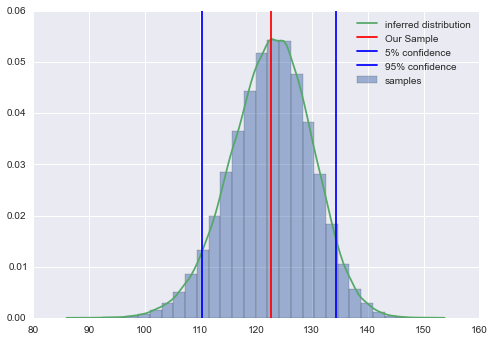

In [33]:
M_samples=100000
N_points = df_conc.shape[0]
bs_np = np.random.choice(df_conc.debit_max, size=(M_samples, N_points))
sd_mean=np.mean(bs_np, axis=1)
sd_std=np.std(bs_np, axis=1)
conf_5=np.percentile(sd_mean, [5])
conf_95=np.percentile(sd_mean, [95])
conf_2=np.percentile(sd_mean,[0.05])

print conf_5, conf_2, conf_95
plt.hist(sd_mean, bins=30, normed=True, alpha=0.5,label="samples");
sns.kdeplot(sd_mean, label="inferred distribution")
plt.axvline(mean, 0, 1, color='r', label='Our Sample')
plt.axvline(conf_5,0,1, color='b', label='5% confidence')
plt.axvline(conf_95,0,1, color='b', label='95% confidence')
plt.legend()

In [ ]:
df_conc['test_logique'] = 1
df_conc.loc[(df_conc['automne'] > 50) & (df_conc['printemps'] >80) & (df_conc['debit_max']>conf_5[0]),
                        'test_logique'] = 2
df_conc.head(50)       

#### Test logique :
    - Si test logique =1 : Retirer l'année
    - Si test logique =2 : À conserver

In [ ]:
df_f=df_conc[df_conc.test_logique==2]

In [ ]:
df_f1=df_f.drop('printemps', axis=1)

In [ ]:
df_f2=df_f1.drop('automne', axis=1)

In [ ]:
df_f3=df_f2.drop('test_logique', axis=1)
df_f3.head(50)

In [ ]:
open(test, 'w')


In [ ]:
np.savetxt(tonnerre_traite_txt)